## MODELLING - GPG - Government Equalities Office

### Target: "DiffMedianHourlyPercent"

#### 1 - General Preparation
- Unnecessary Columns
- Missing Values
- Imputing Values

#### 2 Feature Engineering
- Quantizise Company Size
- Include Company Sector

### Linear Model
Feature Engineering:


In [542]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [543]:
df = None
def load_data(df):
    path = "data/gender-pay-gap-uk-gov/2017.csv.gz"
    df = pd.read_csv(path, compression='gzip')
    return df
df = load_data(df)
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows: {rows}")
print(f"Cols: {cols}")

Rows: 10562
Cols: 25


### 1 - General Preparation

In [544]:
df.head(3)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41


In [545]:
print(df.nunique())

EmployerName                 10561
Address                       9039
CompanyNumber                 9203
SicCodes                      1943
DiffMeanHourlyPercent          829
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1763
DiffMedianBonusPercent        1734
MaleBonusPercent               978
FemaleBonusPercent             979
MaleLowerQuartile              980
FemaleLowerQuartile            980
MaleLowerMiddleQuartile        986
FemaleLowerMiddleQuartile      986
MaleUpperMiddleQuartile        974
FemaleUpperMiddleQuartile      974
MaleTopQuartile                944
FemaleTopQuartile              944
CompanyLinkToGPGInfo          6589
ResponsiblePerson             7304
EmployerSize                     7
CurrentName                  10561
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10474
dtype: int64


In [546]:
df['DueDate'].value_counts()
df['CompanyLinkToGPGInfo'].sample(10)

10113    https://admin.water-plus.co.uk/wpstrategic/med...
746      https://www.axa.co.uk/contentassets/6d3042702d...
6836                                                   NaN
1379                       https://www.brose.com/coventry/
7255                                                   NaN
6608     https://www.oldmutualwealth.co.uk/globalassets...
7860                            http://www.scottbader.com/
789      https://www.babcockinternational.com/Who-We-Ar...
1406     https://www.btplc.com/Purposefulbusiness/Ourap...
8862     https://www.tescoplc.com/little-helps-plan/peo...
Name: CompanyLinkToGPGInfo, dtype: object

### 2 - Feature Cleaning
**Dropping Data:**
- EmployerName / CurrentName: are unique in every row
- CompanyLinkToGPGInfo: contains urls
- ResponsiblePerson: Maybe we could check whether the companies that didn't fill this field also skipped PDFs or if they're incomplete or have a pattern.
- DueDate / DateSubmitted / SubmittedAfterTheDeadline 

In [547]:
columns_to_drop = [
    'EmployerName','CurrentName','CompanyNumber',
    'CompanyLinkToGPGInfo','ResponsiblePerson',
    'DueDate','DateSubmitted','SubmittedAfterTheDeadline'
]
df_cols = df.drop(columns_to_drop, axis='columns')
df.shape

(10562, 25)

#### Imputing values

In [548]:
def check_presence(df):
    return df.notnull().sum() / df.shape[0]
check_presence(df_cols)

Address                      0.974153
SicCodes                     0.946317
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         0.998106
DiffMedianBonusPercent       0.998106
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
EmployerSize                 1.000000
dtype: float64

In [549]:
# Mean because the measurement is mean
mean_bonus_percent = df_cols['DiffMeanBonusPercent'].mean()
df_cols['DiffMeanBonusPercent'] = df_cols['DiffMeanBonusPercent'].fillna(mean_bonus_percent)

# Median because the measurement is median
median_bonus_percent = df['DiffMedianBonusPercent'].median()
df_cols['DiffMedianBonusPercent'] = df_cols['DiffMedianBonusPercent'].fillna(median_bonus_percent)

# Mode because it is categorical
employer_size_mode = df_cols['EmployerSize'].mode()
df_cols['EmployerSize'] = df_cols['EmployerSize'].fillna(employer_size_mode)

# employer_size_mode
check_presence(df_cols)

Address                      0.974153
SicCodes                     0.946317
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         1.000000
DiffMedianBonusPercent       1.000000
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
EmployerSize                 1.000000
dtype: float64

In [550]:
df_cols['EmployerSize'].replace('Not Provided', '250 to 499', inplace=True)
df_cols['EmployerSize'].value_counts()
# check_presence(df)

250 to 499        5026
500 to 999        2534
1000 to 4999      2208
5000 to 19,999     441
Less than 250      288
20,000 or more      65
Name: EmployerSize, dtype: int64

#### EmpoyerSize range to quantitative category

In [551]:
# Could come a copy here.
cat_to_quant = {
 'Less than 250' : 125,
 '250 to 499' : 375,
 '500 to 999': 750,
 '1000 to 4999' : 2500,
 '5000 to 19,999': 15000,
 '20,000 or more': 35000
}

# ONE TIME EXECUTION
df_cols['EmployerSize'] = df_cols['EmployerSize'].map(cat_to_quant)

df_cols['EmployerSize'].value_counts()
# check_presence(df)

375      5026
750      2534
2500     2208
15000     441
125       288
35000      65
Name: EmployerSize, dtype: int64

### 3 Linear Model - Raw

In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [553]:
def split_data(data, target, features):
    X = data[features]
    y = data[target]
    return train_test_split(X, y, random_state=42)

In [587]:
features = [
    'DiffMeanBonusPercent', 'DiffMedianBonusPercent',
    'MaleBonusPercent', 'FemaleBonusPercent',
    'MaleLowerQuartile', 'FemaleLowerQuartile',
    'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
    'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
    'MaleTopQuartile', 'FemaleTopQuartile', 'EmployerSize'
]

target = 'DiffMedianHourlyPercent'
X_train, X_test, y_train, y_test = split_data(df_cols, target, features)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7921, 13) (7921,)
(2641, 13) (2641,)


In [588]:
def learn(X_train, y_train):
    linear_reg = LinearRegression(normalize=True)
    linear_reg.fit(X_train, y_train)
    return linear_reg

line_reg = learn(X_train, y_train)
line_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [589]:
def evaluate(model, X, y):
    y_preds = model.predict(X)
    return r2_score(y, y_preds, multioutput='raw_values')

train_score = evaluate(line_reg,X_train,y_train)
test_score = evaluate(line_reg,X_test,y_test)
    
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: [0.49322808]
Test Score: [0.5006404]


In [590]:
### Feature Analysis
coeff_df = pd.DataFrame({'Column': list(X_train.columns), 'Coeff': line_reg.coef_})
coeff_df['AbsCoeff'] = abs(coeff_df['Coeff'])
coeff_df.sort_values(by=["AbsCoeff"], ascending=False)

,Column,Coeff,AbsCoeff
4,MaleLowerQuartile,-0.299702,0.299702
5,FemaleLowerQuartile,0.299702,0.299702
10,MaleTopQuartile,0.252454,0.252454
11,FemaleTopQuartile,-0.252454,0.252454
9,FemaleUpperMiddleQuartile,-0.171164,0.171164
8,MaleUpperMiddleQuartile,0.171164,0.171164
7,FemaleLowerMiddleQuartile,0.147477,0.147477
6,MaleLowerMiddleQuartile,-0.147477,0.147477
2,MaleBonusPercent,0.035340,0.035340
3,FemaleBonusPercent,-0.021573,0.021573


- It looks like Lower and Upper quartiles explain hourly difference.
- Followed by Upped Quartiles in less relevance
- Apparently Bonuses don't influence much.  Are `XBonusPercent` and `DiffXBonusPercent` really irrelevant`DiffHourly`? TODO: Check anomalies.

I still believe `EmployerSize` explains the pay gap, but maybe not? TODO: Don't use numers, use categories.

#### Include Industry Categories - Prepare Sic Codes
Details are present in EDA Notebook.

In [591]:
df_cols['SicCodes'] = df_cols['SicCodes'].astype(str)
df_cols['SicCodes'].value_counts()

nan                                    567
82990                                  446
1                                      336
1,\r\n84110                            306
70100                                  277
                                      ... 
47429                                    1
78101,\r\n85310                          1
41202,\r\n43290,\r\n43910,\r\n43999      1
8110,\r\n38110,\r\n38320,\r\n43120       1
8120,\r\n23510,\r\n23610,\r\n23630       1
Name: SicCodes, Length: 1944, dtype: int64

In [592]:
df_cols['SicCodes'] = df_cols['SicCodes'].apply(lambda sic_code: sic_code\
                                         .replace('\r','').replace('\n','')\
                                         .split(','))

In [593]:
print(df_cols.shape)
df_cols = df_cols.explode('SicCodes')
print(df_cols.shape)
df_cols['SicCodes'].value_counts()

(10562, 17)
(15499, 17)


1        1733
nan       567
82990     566
85310     565
70100     372
         ... 
18201       1
12000       1
82190       1
10620       1
26600       1
Name: SicCodes, Length: 622, dtype: int64

In [594]:
df_cols['SicCodes'] = df_cols['SicCodes'].replace(to_replace='nan', value='0')
df_cols['SicCodes'] = df_cols['SicCodes'].astype(int)
df_cols['SicCodes'].value_counts()

1        1733
0         567
82990     566
85310     565
85200     372
         ... 
14310       1
14120       1
10730       1
74203       1
30400       1
Name: SicCodes, Length: 622, dtype: int64

#### Include Industry Categories - Merge Sic Codes

In [595]:
sic_codes = pd.read_csv("data/siccodes/uk-sic-2007-condensed_csv.csv")
sic_codes.shape

(731, 5)

In [596]:
sic_codes.drop('sic_version', axis='columns', inplace=True) # One Time Execution
sic_codes.rename(columns={"sic_code": "SicCodes", "section_description": "SectionDesc"}, inplace=True)
df_cols['SicCodes'] = df_cols['SicCodes'].astype(int)
print(sic_codes.columns)

Index(['SicCodes', 'sic_description', 'section', 'SectionDesc'], dtype='object')


#### Generate Dummy Values

In [597]:
# 'section' column encodes the Industry sector with letters [A-U]
sic_codes[['SectionDesc','section']].nunique()
sic_codes[['SectionDesc','section']].sample(5)

,SectionDesc,section
90,Manufacturing,C
290,Manufacturing,C
214,Manufacturing,C
452,Wholesale and retail trade; repair of motor ve...,G
628,Administrative and support service activities,N


In [598]:
sector_dummies = pd.get_dummies(sic_codes['section'], prefix="Sect", prefix_sep="")
sector_dummies

,SectA,SectB,SectC,SectD,SectE,SectF,SectG,SectH,SectI,SectJ,...,SectL,SectM,SectN,SectO,SectP,SectQ,SectR,SectS,SectT,SectU
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [599]:
print(sic_codes.shape)
sic_codes = pd.concat([sic_codes, sector_dummies], axis = 1) # One Time Execution
print(sic_codes.shape)

(731, 4)
(731, 25)


In [600]:
df_sec = pd.merge(df_cols, sic_codes, on=['SicCodes']) # One Time execution
df_sec.shape

(13199, 41)

In [601]:
check_presence(df_sec)

Address                      0.998257
SicCodes                     1.000000
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         1.000000
DiffMedianBonusPercent       1.000000
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
EmployerSize                 1.000000
sic_description              1.000000
section                      1.000000
SectionDesc                  1.000000
SectA                        1.000000
SectB                        1.000000
SectC                        1.000000
SectD                        1.000000
SectE                        1.000000
SectF                        1.000000
SectG       

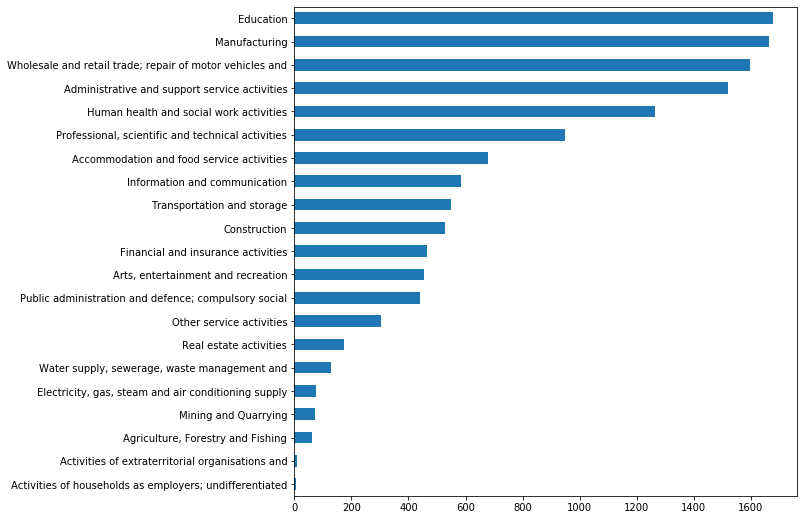

In [602]:
df_sec['SectionDesc'].value_counts().sort_values().plot.barh(figsize=(9,9))

### Linear Model - Include Sector

In [603]:
features_sec = features
for c in range(ord('A'), ord('U')+1):
    features_sec.append("Sect" + chr(c))
features_sec

['DiffMeanBonusPercent',
 'DiffMedianBonusPercent',
 'MaleBonusPercent',
 'FemaleBonusPercent',
 'MaleLowerQuartile',
 'FemaleLowerQuartile',
 'MaleLowerMiddleQuartile',
 'FemaleLowerMiddleQuartile',
 'MaleUpperMiddleQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleTopQuartile',
 'FemaleTopQuartile',
 'EmployerSize',
 'SectA',
 'SectB',
 'SectC',
 'SectD',
 'SectE',
 'SectF',
 'SectG',
 'SectH',
 'SectI',
 'SectJ',
 'SectK',
 'SectL',
 'SectM',
 'SectN',
 'SectO',
 'SectP',
 'SectQ',
 'SectR',
 'SectS',
 'SectT',
 'SectU']

In [604]:
X = df_sec[features_sec]
y = df_sec[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train, X_test, y_train, y_test = split_data(df_sec, 'target', features)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9899, 34) (9899,)
(3300, 34) (3300,)


In [605]:
line_reg = learn(X_train, y_train)
line_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [606]:
train_score = evaluate(line_reg, X_train, y_train)
test_score = evaluate(line_reg, X_test,y_test)
print("Train Score:", train_score)
print("Train Score:", test_score)

Train Score: [0.55066652]
Train Score: [0.52755863]


In [626]:
# Feature Analysis
sections = list(sic_codes['section'].unique())
section_descs = list(sic_codes['SectionDesc'].unique())
section_dict = {}
for i in range(len(sections)):
    section_dict["Sect"+sections[i]] = section_descs[i]
section_dict

{'SectA': 'Agriculture, Forestry and Fishing',
 'SectB': 'Mining and Quarrying',
 'SectC': 'Manufacturing',
 'SectD': 'Electricity, gas, steam and air conditioning supply',
 'SectE': 'Water supply, sewerage, waste management and',
 'SectF': 'Construction',
 'SectG': 'Wholesale and retail trade; repair of motor vehicles and',
 'SectH': 'Transportation and storage',
 'SectI': 'Accommodation and food service activities',
 'SectJ': 'Information and communication',
 'SectK': 'Financial and insurance activities',
 'SectL': 'Real estate activities',
 'SectM': 'Professional, scientific and technical activities',
 'SectN': 'Administrative and support service activities',
 'SectO': 'Public administration and defence; compulsory social',
 'SectP': 'Education',
 'SectQ': 'Human health and social work activities',
 'SectR': 'Arts, entertainment and recreation',
 'SectS': 'Other service activities',
 'SectT': 'Activities of households as employers; undifferentiated',
 'SectU': 'Activities of extrate

In [625]:
coeff_df = pd.DataFrame({'Column': X_train.columns, 'Coeff': line_reg.coef_})
coeff_df['AbsCoeff'] = abs(coeff_df['Coeff'])
coeff_df['SectDesc'] = coeff_df['Column'].map(section_dict)
coeff_df.sort_values(by=['AbsCoeff'], ascending=False)

,Column,Coeff,AbsCoeff,SectDesc
28,SectP,7.106468e+11,7.106468e+11,Education
18,SectF,7.106468e+11,7.106468e+11,Construction
14,SectB,7.106468e+11,7.106468e+11,Mining and Quarrying
16,SectD,7.106468e+11,7.106468e+11,"Electricity, gas, steam and air conditioning s..."
22,SectJ,7.106468e+11,7.106468e+11,Information and communication
23,SectK,7.106468e+11,7.106468e+11,Financial and insurance activities
25,SectM,7.106468e+11,7.106468e+11,"Professional, scientific and technical activities"
26,SectN,7.106468e+11,7.106468e+11,Administrative and support service activities
29,SectQ,7.106468e+11,7.106468e+11,Human health and social work activities
17,SectE,7.106468e+11,7.106468e+11,"Water supply, sewerage, waste management and"


- Why are all Section Features such big numbers?